Assignment 4 - social network analysis

We creatad network graph using memgraph that looks at the communication between politicians and other X users. With this analysis we want to investigate whether different parties have different or overlapping twitter communities. We expect that parties with a similar political direction reach similar audiances. However, we might also expect controversial statements to receive replies from multiple political directions.

We used the following search query to view tweets that politicians posted while linking them to their party:

match (p:Party)-[e2]-(u:User)-[e1:POSTED]-(t:Tweet)-[e3]-(v:Tweet)-[e4:POSTED]-(w:User)

RETURN * 



In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

After having transformed the json-file that is the output of memgraph we load to graphml file to start our analysis

In [27]:
mygraph = nx.read_graphml("memgraph-query-results-export.graphml")

In [3]:
testgraph = nx.read_graphml("memgraph-query-results-export (1).graphml")

Perform community mining

In [102]:
louv_com =nx.community.louvain_communities(mygraph, seed=12, resolution=0.2)
#change resolution to get less communities, make value smaller than 1

In [103]:
len(louv_com)

28

In [73]:
louv_com_test =nx.community.louvain_communities(testgraph, seed=12, resolution=0.5)
#change resolution to get less communities, make value smaller than 1

Assigning the community number to each node

In [ ]:
#for the small test data set
community_nr = 1
for community in louv_com_test:
    print(community_nr)
    for node in community:
        print(node)
        testgraph.nodes[node]['community']=community_nr
    community_nr += 1

In [104]:
#for the actual  data set
community_nr = 1
for community in louv_com:
    print(community_nr)
    for node in community:
        print(node)
        mygraph.nodes[node]['community']=community_nr
    community_nr += 1

1
66611
366568
416891
318768
241172
340742
112337
83126
361174
55215
26286
284534
203828
231457
215574
43236
306885
12411
350424
164885
5358
166376
55731
169201
186211
346674
344653
361231
72535
223607
243150
367981
414747
71855
352264
79168
43509
220498
40847
358158
325283
306995
62946
138717
256984
344698
186331
241682
241614
148023
131628
281066
117875
219005
164900
30546
155021
346747
185630
217309
241276
305598
337163
255030
323375
336219
20074
431191
434064
65821
120869
165775
363052
345316
55465
351617
203584
5310
324792
343129
139377
264396
242565
331330
270640
176866
107557
203981
164845
150672
355791
23494
14956
69166
166842
243546
175114
307882
247450
176723
366584
86260
71888
337162
157143
281385
26400
320482
264698
87704
241853
207351
349823
262152
268895
106369
103966
140802
355795
249860
71848
348907
180623
135940
341498
112144
227098
268544
264865
276869
138504
17778
306884
128207
79560
25640
332752
71949
395900
331034
96019
309264
190242
182786
50937
169689
34010
8948


In [36]:
#first test to see if it works at all, come up with a different coloring scheme on small test set
community_colors = {}
counter = 0
colors = itertools.cycle(["r", "g", "y", "c", "m", "orange", "pink", "purple", "brown"])
for community in louv_com_test:
    print(community)
    counter +=1
    color = next(colors)
    print(f"Assigning color {color}")
    for node in community:
        community_colors[node] =  color
print(counter)

{'251455', '251456', '252113', '201294', '251528', '251957', '201248', '205364', '251527', '251529', '345396', '251457', '251530', '251505', '358639', '205363'}
Assigning color r
{'315021', '153088', '40828', '351970', '132211', '77154', '324941', '240722', '26265', '76736', '153108', '16187', '249257', '236246', '4731', '151719', '290665', '4710', '160966', '108486', '225187', '95420', '327350', '112208', '91308', '358473', '297436', '236224', '127008', '153687', '317295', '10929', '26144', '345414', '294758', '127916', '75757', '291071', '345405', '76887', '218699', '65800', '345422', '248702', '235201', '249258', '288944', '10940', '165889', '50892', '25589', '155021', '40721', '186220', '183008', '16059', '264968', '280539', '193422', '5256', '16120', '4713', '203584', '200728', '174565', '246138', '264396', '264969', '155028', '108485', '281222', '95617', '40733', '25970', '40726', '135985', '103963', '345403', '25706', '23440', '290676', '217743', '135906', '345390', '163433', '2

In [ ]:
#on actual dataset
community_colors = {}
colors = itertools.cycle(["r", "g", "b", "y", "c", "m", "orange", "pink", "purple", "brown"])
for community in louv_com:
    color = next(colors)
    print(f"Assigning color {color}")
    for node in community:
        community_colors[node] =  color

In [37]:
color_map = []

In [38]:
# Assign colors to nodes based on their community
for node in testgraph.nodes():
    color_map.append(community_colors[node])

all positions are done
plot is done


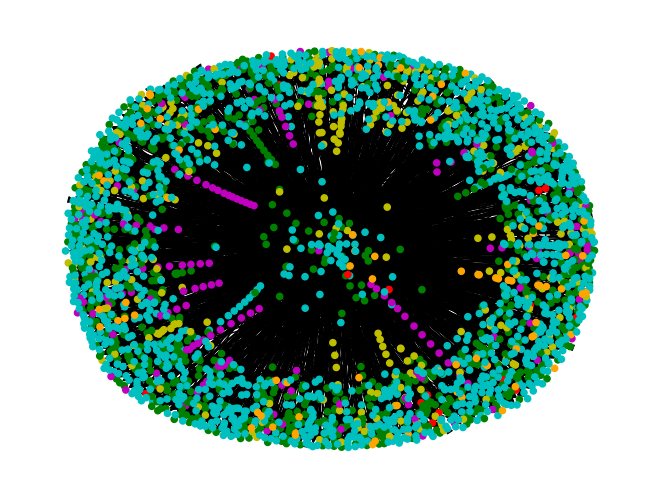

In [39]:
# Draw the graph....this took way too long on the big dataset
pos = nx.spring_layout(testgraph)  # positions for all nodes
print('all positions are done')
nx.draw(testgraph, pos, node_color=color_map, with_labels=False, node_size=20, font_color='white')
print('plot is done')
# Show the plot
plt.show()

Next: Analyse communities

In [98]:
#for small test set
modularity_test = nx.community.modularity(testgraph, louv_com_test)
modularity_test

0.7238425979541716

In [105]:
modularity = nx.community.modularity(mygraph, louv_com)
modularity

0.392265875840763

In [108]:
def intra_inter(graph):
    intra = {}
    inter = {}

    for u, v in graph.edges():
        com_node1 = graph.nodes[u]['community']
        com_node2 = graph.nodes[v]['community']
        if com_node1 == com_node2:
            if com_node1 not in intra:
                intra[com_node1]=1
            else:
                intra[com_node1]+=1
        else:
            if (com_node1, com_node2) not in inter:
                if (com_node2, com_node1) not in inter:
                    inter[(com_node1, com_node2)]=1
                else:
                    inter[(com_node2, com_node1)]+=1
            else:
                inter[(com_node1, com_node2)]+=1
        
    return intra, inter


In [114]:
#for small test data set
intra_test, inter_test = intra_inter(testgraph)
print(f'intra edges: {intra_test}')
print(f'inter edgdes:{inter_test}')

intra edges: {7: 1292, 9: 78, 2: 728, 6: 420, 10: 107, 12: 428, 3: 134, 5: 358, 1: 21, 4: 275, 8: 122, 11: 65}
inter edgdes:{(7, 9): 20, (7, 8): 36, (7, 12): 107, (9, 2): 2, (9, 6): 1, (9, 8): 2, (9, 12): 3, (7, 10): 15, (2, 7): 8, (2, 6): 79, (7, 6): 9, (12, 5): 5, (6, 3): 10, (3, 2): 29, (3, 4): 9, (5, 2): 39, (5, 3): 13, (5, 4): 7, (5, 8): 2, (5, 6): 4, (1, 6): 1, (2, 4): 23, (2, 10): 2, (2, 8): 7, (4, 8): 1, (4, 9): 1, (4, 10): 1, (4, 6): 1, (4, 12): 5, (11, 2): 1, (11, 12): 6, (11, 5): 3, (11, 6): 2, (10, 5): 1, (8, 12): 9, (3, 11): 2, (3, 8): 1, (11, 7): 7, (12, 2): 2, (7, 3): 1, (7, 4): 1, (7, 5): 1, (8, 11): 2, (8, 10): 3, (10, 12): 5, (12, 6): 2}


In [115]:
#for small test data set
compare_intra_inter_test = {}
for community in intra_test:
    count_inter_edges = 0
    for edges in inter_test:
        if edges[0] == community | edges[1]== community:
            count_inter_edges += inter_test[edges]
    compare_intra_inter_test[community] = (intra_test[community], count_inter_edges)

compare_intra_inter_test

{7: (1292, 12),
 9: (78, 2),
 2: (728, 0),
 6: (420, 0),
 10: (107, 0),
 12: (428, 0),
 3: (134, 29),
 5: (358, 7),
 1: (21, 0),
 4: (275, 0),
 8: (122, 0),
 11: (65, 1)}

In [111]:
#for actual data set
intra, inter = intra_inter(mygraph)
print(f'intra edges: {intra}')
print(f'inter edgdes:{inter}')

intra edges: {4: 192899, 1: 52046, 28: 1273, 5: 2124, 21: 2367, 2: 6354, 16: 41, 17: 6, 13: 12, 26: 1992, 27: 26, 15: 15, 7: 8, 8: 4, 6: 13, 18: 50, 9: 21, 10: 4, 11: 4, 12: 7, 14: 4, 3: 6, 19: 10, 20: 4, 22: 4, 23: 4, 24: 6, 25: 4}
inter edgdes:{(4, 1): 2754, (4, 5): 672, (4, 16): 7, (4, 6): 3, (4, 17): 1, (4, 2): 1518, (4, 18): 17, (4, 10): 1, (4, 19): 3, (4, 23): 1, (4, 12): 2, (4, 13): 4, (1, 5): 16, (1, 18): 1, (28, 1): 6, (28, 26): 4, (4, 24): 2, (4, 21): 24, (1, 21): 129, (4, 11): 1, (4, 22): 1, (4, 3): 2, (4, 20): 1, (4, 25): 1, (4, 8): 1, (4, 14): 1, (4, 27): 3, (4, 26): 181, (4, 7): 2, (4, 28): 5, (1, 26): 95, (1, 2): 54, (5, 26): 3, (26, 2): 8, (4, 15): 5, (21, 26): 2, (9, 1): 1, (16, 1): 1, (2, 21): 1}


In [121]:
compare_intra_inter = {}
for community in intra:
    count_inter_edges = 0
    for edges in inter:
        if edges[0] == community or edges[1]== community:
            count_inter_edges += inter[edges]
    compare_intra_inter[community] = (intra[community], count_inter_edges)

compare_intra_inter

{4: (192899, 5213),
 1: (52046, 3057),
 28: (1273, 15),
 5: (2124, 691),
 21: (2367, 156),
 2: (6354, 1581),
 16: (41, 8),
 17: (6, 1),
 13: (12, 4),
 26: (1992, 293),
 27: (26, 3),
 15: (15, 5),
 7: (8, 2),
 8: (4, 1),
 6: (13, 3),
 18: (50, 18),
 9: (21, 1),
 10: (4, 1),
 11: (4, 1),
 12: (7, 2),
 14: (4, 1),
 3: (6, 2),
 19: (10, 3),
 20: (4, 1),
 22: (4, 1),
 23: (4, 1),
 24: (6, 2),
 25: (4, 1)}